In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
lemma = WordNetLemmatizer()

from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria



In [2]:
#pip install nltk
#nltk.download('wordnet')


In [3]:
tweet = pd.read_csv('train.csv')
data=tweet
data.shape

(3235, 6)

In [4]:
test=pd.read_csv('test.csv',index_col=0)
test.shape

(1387, 4)

In [5]:
#print(len(data[data.sentiment_class==0]))
#data.shape
data.groupby(['retweet_count']).count()

,id,original_text,lang,original_author,sentiment_class
retweet_count,,,,,
BLOOD OF PROTECTION AROUND YOU GUYS,1,1,1,1,1
He's told me I don't understand what it means to be a special agent LOL,1,1,1,1,1
Shop &lt,2,2,2,2,2
have no other means of occasional transportation! Mary.,1,1,1,1,1
-0.057256529,1,1,1,1,1
...,...,...,...,...,...
7,3,3,3,3,3
8,7,7,7,7,7
9,2,2,2,2,2


In [6]:
# preprocessing the tweets 
def normalize_tweet(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)    
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    
    return tweets
    

In [7]:
word_count=dict()
stop_words = set(stopwords.words('english'))
def pre_tweet(tweet):
    tweet.lower()
    words=tweet.split()
    for word in words:
        if word not in stop_words:
            if word not in word_count:
                word_count[word]=1
            else:
                word_count[word]+=1
            
    

In [8]:
data['normalize_txt'] = data.original_text.apply(normalize_tweet)

In [9]:
#data['word_count']=data.normalize_txt.apply(pre_tweet)
data.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class,normalize_txt
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0,happy mothersday amazing mother know hard able...
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0,happy mother day mum sorry bring mother day fl...
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1,happy mother day mother day work today quiet t...
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0,happy mother day beautiful woman royalty sooth...
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1,remembering amazing lady made late grandmother...


In [10]:
def extract_hastag(tweet):
    tweets = " ".join(filter(lambda x :x[0]=='#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    
    return tweets
    

In [11]:
data['hastag'] = data.original_text.apply(extract_hastag)

In [12]:
all_words = " ".join(data.normalize_txt)
positive_words = " ".join(data[data.sentiment_class==1].normalize_txt)
negative_words = " ".join(data[data.sentiment_class==-1].normalize_txt)
#print(negative_words)

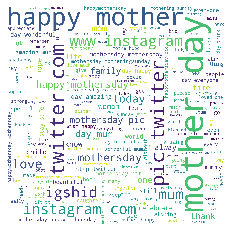

In [13]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

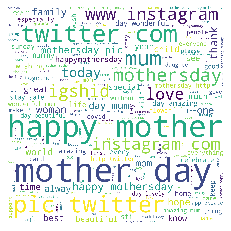

In [14]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color = 'white')
wordcloud = wordcloud.generate(positive_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
freq_all_hashtag = FreqDist(list((" ".join(data.hastag)).split())).most_common(10)
freq_all_hashtag

[('mothersday', 1858),
 ('happymothersday', 291),
 ('motheringsunday', 161),
 ('mother', 153),
 ('mum', 129),
 ('love', 120),
 ('covid', 105),
 ('family', 73),
 ('stayathome', 54),
 ('staysafe', 53)]

In [16]:
freq_pos_hashtag = FreqDist(list((" ".join(data[data['sentiment_class']==0]['hastag'])).split())).most_common(20)
freq_pos_hashtag

[('mothersday', 991),
 ('happymothersday', 159),
 ('motheringsunday', 89),
 ('mother', 71),
 ('mum', 69),
 ('covid', 57),
 ('love', 56),
 ('family', 44),
 ('stayathome', 33),
 ('staysafe', 32),
 ('motherhood', 27),
 ('mothersdayshoutout', 22),
 ('mom', 21),
 ('coronavirus', 19),
 ('socialdistancing', 18),
 ('happy', 18),
 ('mummy', 15),
 ('stayhomesavelives', 15),
 ('motherslove', 13),
 ('sunday', 11)]

In [17]:
data.head()
data.normalize_txt

0       happy mothersday amazing mother know hard able...
1       happy mother day mum sorry bring mother day fl...
2       happy mother day mother day work today quiet t...
3       happy mother day beautiful woman royalty sooth...
4       remembering amazing lady made late grandmother...
                              ...                        
3230    sister sister law also friend wishing happy mo...
3231    happy mother day mum step mum aunty grandmothe...
3232    happy mother day craziest woman know thanks al...
3233    happy mother day amazing wife love like crazy ...
3234    wishing safe happy mother day mothersday reedh...
Name: normalize_txt, Length: 3235, dtype: object

to create sparse matrix corpus is created to pass to vectorizer
n=len(data)
corpus = []
for i in range(0,3235):
    corpus.append(data['normalize_txt'][i])
corpus[3]

In [18]:
#to create sparse matrix corpus is created to pass to vectorizer
n=len(data)
corpus = []
for i in range(0,n):
    corpus.append(data['normalize_txt'][i])
#corpus

In [19]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
X = cv.transform(corpus).toarray()
y = data.sentiment_class
y

0       0
1       0
2      -1
3       0
4      -1
       ..
3230    0
3231    1
3232    0
3233    0
3234   -1
Name: sentiment_class, Length: 3235, dtype: int64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [26]:
classifier1 = LogisticRegression(C=10,multi_class='ovr')
classifier1.fit(X_train, y_train)

/home/udhay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/udhay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [29]:
#print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.27      0.19      0.22       251
           0       0.52      0.69      0.59       545
           1       0.27      0.17      0.21       272

    accuracy                           0.44      1068
   macro avg       0.36      0.35      0.34      1068
weighted avg       0.40      0.44      0.41      1068

[[ 48 158  45]
 [ 90 375  80]
 [ 38 187  47]]
